In [1]:
pip install pandas scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/cofee_sales.csv')

In [4]:
print(f"Shape: {df.shape}")
df.head()

Shape: (1133, 6)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


**Data Cleaning & Feature Engineering**

In [5]:
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={'money': 'sales'}, inplace=True)

In [6]:
# Missing values
num_cols = ['sales']
cat_cols = ['cash_type', 'card', 'coffee_name']

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

In [7]:
# Feature engineering
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [8]:
df['year']     = df['date'].dt.year
df['month']    = df['date'].dt.to_period('M').astype(str)
df['dayofwk']  = df['date'].dt.day_name()
df['hour']     = df['datetime'].dt.hour

df.head()

,date,datetime,cash_type,card,sales,coffee_name,year,month,dayofwk,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024,2024-03,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,2024-03,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,2024-03,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024,2024-03,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024,2024-03,Friday,13


**Exploratory Data Analysis**

In [9]:
plt.rcParams['figure.figsize'] = (10, 5)

In [12]:
 # Monthly sales trend
import plotly.express as px
monthly = df.groupby('month')['sales'].sum().reset_index()
px.line(monthly, x='month', y='sales', title='Monthly Coffee-Machine Revenue')

**Top products**

/tmp/ipython-input-13-1804642294.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




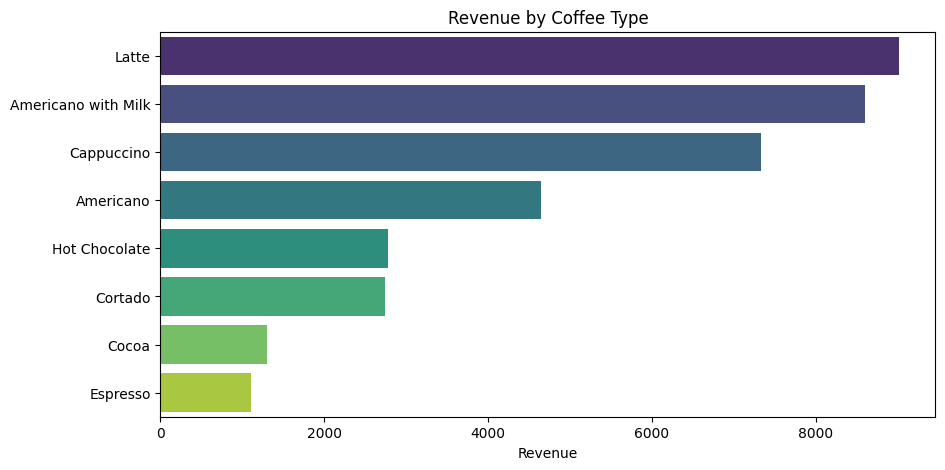

In [13]:
top_prod = df.groupby('coffee_name')['sales'].sum().sort_values(ascending=False)
sns.barplot(y=top_prod.index, x=top_prod.values, palette='viridis')
plt.title('Revenue by Coffee Type'); plt.xlabel('Revenue'); plt.ylabel('')
plt.show()

**Hourly sales heatmap**

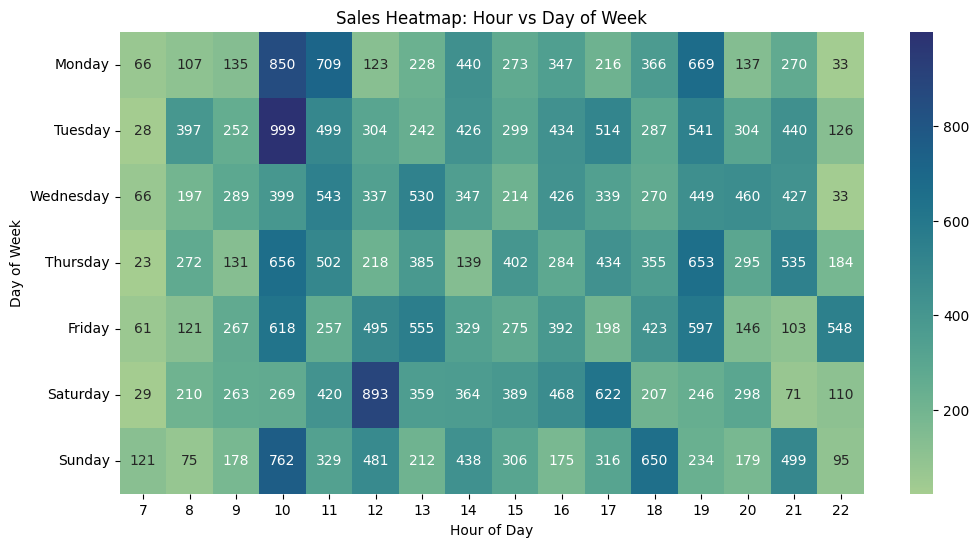

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot for heatmap
hourly = (df.groupby(['dayofwk', 'hour'])['sales']
            .sum().reset_index()
            .pivot(index='dayofwk', columns='hour', values='sales')
            .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hourly, cmap='crest', annot=True, fmt=".0f")
plt.title('Sales Heatmap: Hour vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


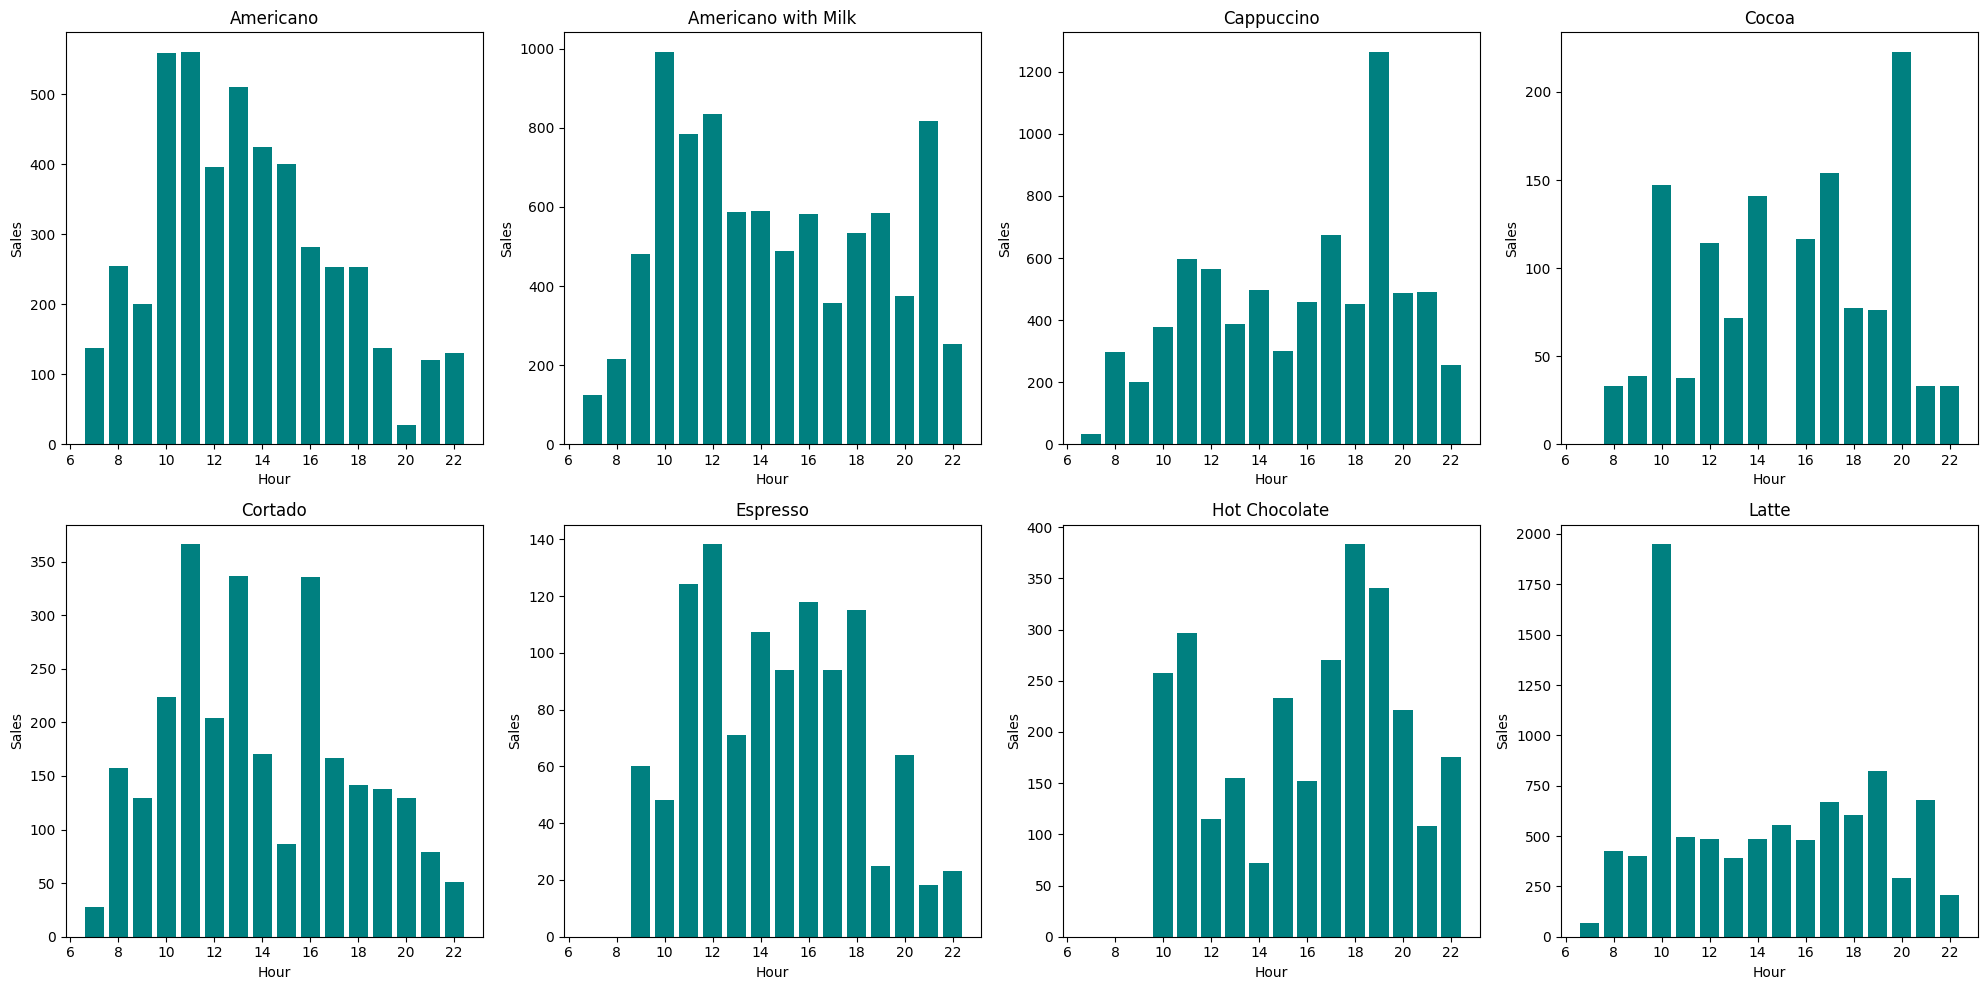

In [15]:
# Hourly Sales per Coffee Product
hourly_by_product = (
    df.groupby(['hour', 'coffee_name'])['sales']
    .sum()
    .reset_index()
    .pivot(index='hour', columns='coffee_name', values='sales')
    .fillna(0)
)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(hourly_by_product.columns):
    axs[i].bar(hourly_by_product.index, hourly_by_product[column], color='teal')
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()


**Machine Learning Modeling**

In [16]:
# Encode categorical variables
ml_df = df[['sales', 'coffee_name', 'cash_type', 'hour', 'dayofweek']]
ml_df = pd.get_dummies(ml_df, columns=['coffee_name', 'cash_type', 'dayofweek'], drop_first=True)

# Define target and features
X = ml_df.drop(columns=['sales'])
y = ml_df['sales']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




KeyError: "['dayofweek'] not in index"

In [17]:
print(df.columns.tolist())

['date', 'datetime', 'cash_type', 'card', 'sales', 'coffee_name', 'year', 'month', 'dayofwk', 'hour']


In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['dayofweek'] = df['date'].dt.day_name()
print(df[['date', 'dayofweek']].head())

        date dayofweek
0 2024-03-01    Friday
1 2024-03-01    Friday
2 2024-03-01    Friday
3 2024-03-01    Friday
4 2024-03-01    Friday


In [19]:
ml_df = df[['sales', 'coffee_name', 'cash_type', 'hour', 'dayofweek']]
ml_df = pd.get_dummies(ml_df, columns=['coffee_name', 'cash_type', 'dayofweek'], drop_first=True)

# Define X (features) and y (target)
X = ml_df.drop(columns=['sales'])
y = ml_df['sales']

In [20]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data ready for modeling!")

Data ready for modeling!


**Linear Regression Model**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 3.39
R² Score: 0.82


**Visualize Predictions vs Actual Sales**

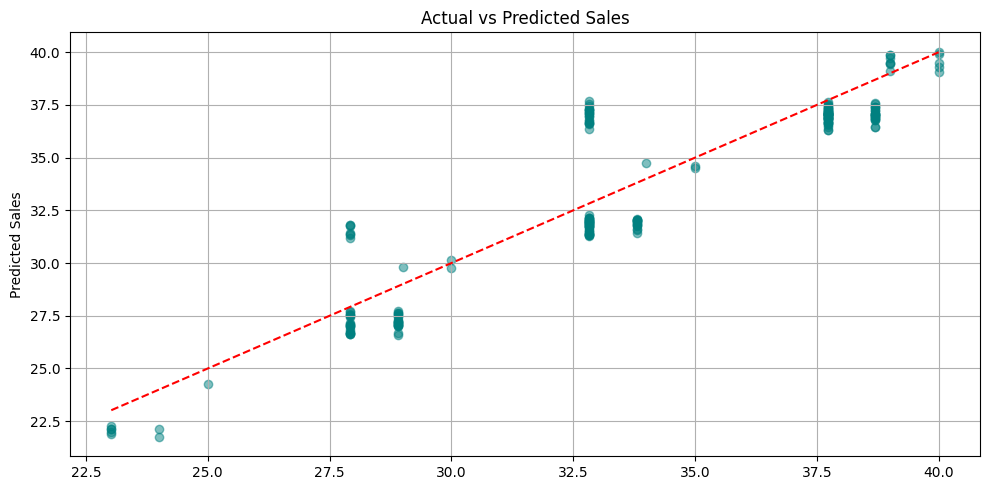

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

**Feature Importance**

/tmp/ipython-input-24-1658859202.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




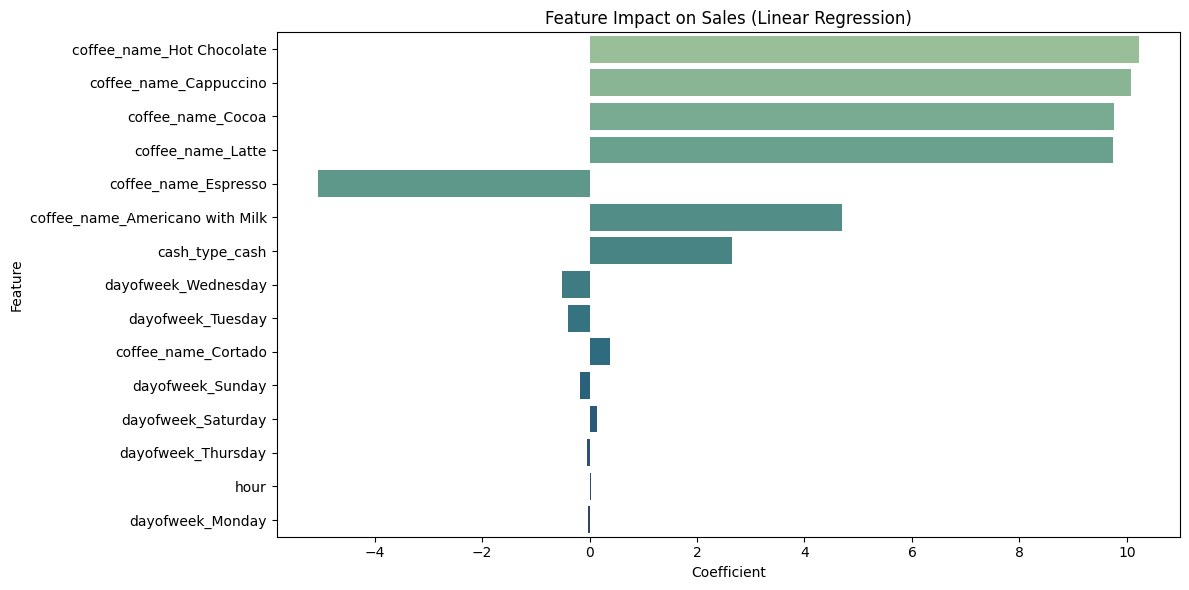

In [24]:
import pandas as pd
import seaborn as sns

# Coefficients from the linear regression model
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='crest')
plt.title('Feature Impact on Sales (Linear Regression)')
plt.tight_layout()
plt.show()

**Random Forest Regressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Model Performance:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Model Performance:
Mean Squared Error (MSE): 3.82
R² Score: 0.79


**Plot Predictions vs Actual (Random Forest)**


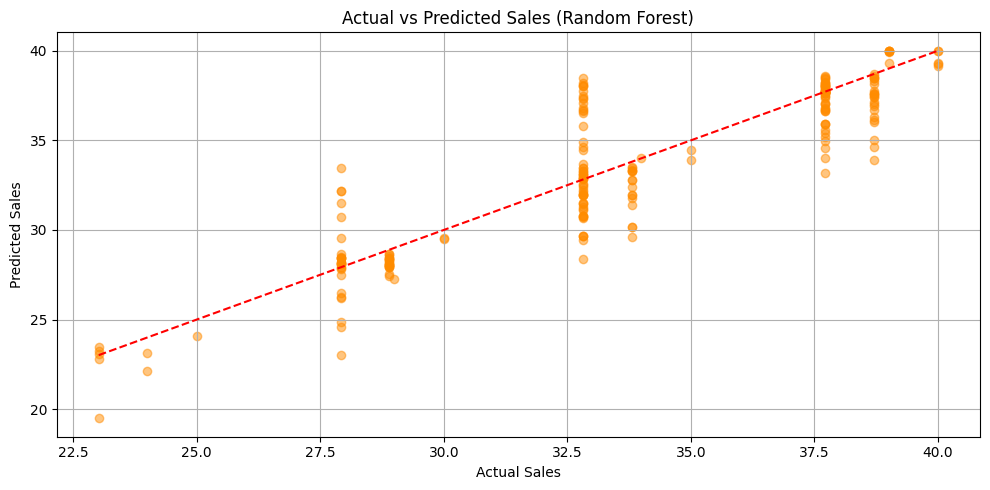

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Feature Importance from Random Forest**

/tmp/ipython-input-27-1144690444.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




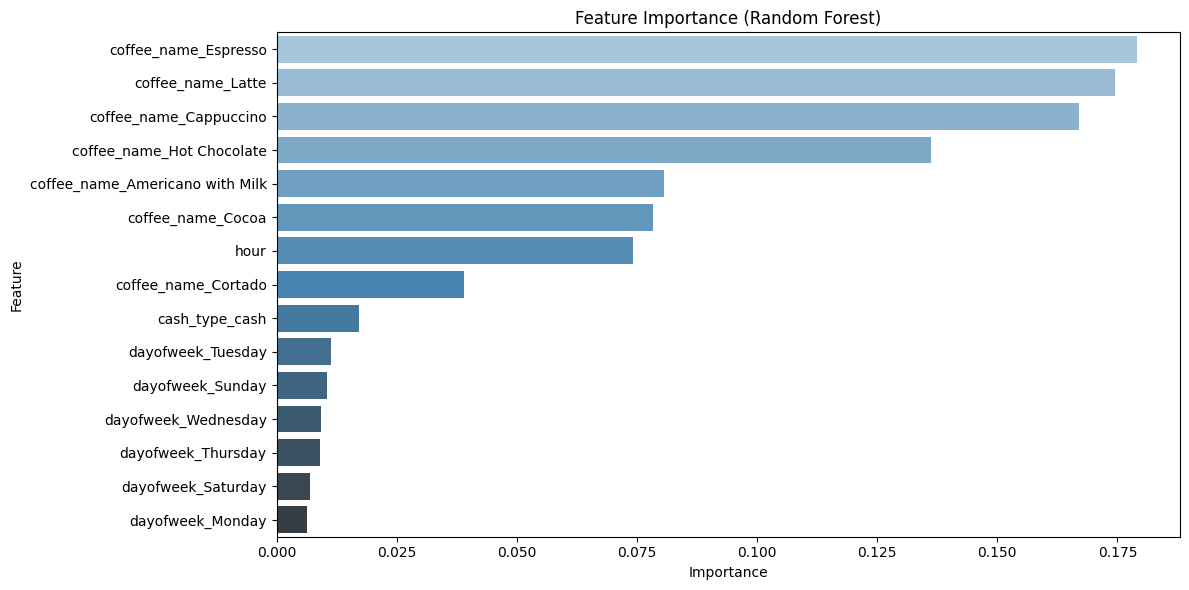

In [27]:
import pandas as pd
import seaborn as sns

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='Blues_d')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [28]:
# Combine actual and predicted into one DataFrame
results_df = pd.DataFrame({
    'Actual_Sales': y_test,
    'Predicted_Sales': rf_pred
}).reset_index(drop=True)

results_df.to_csv('coffee_sales_predictions.csv', index=False)

from google.colab import files
files.download('coffee_sales_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
X_test_copy = X_test.copy()
X_test_copy['Actual_Sales'] = y_test.values
X_test_copy['Predicted_Sales'] = rf_pred

X_test_copy.to_csv('full_predictions_with_features.csv', index=False)
files.download('full_predictions_with_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>